<a href="https://colab.research.google.com/github/seunghee-lee/option/blob/main/Data_Collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Kospi 자료 수집 및 분석

In [1]:
!pip install -U finance-datareader
!pip install pandas-datareader
!pip install yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.8 MB/s eta 0:00:00


In [2]:
!pip install --upgrade yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.4/118.4 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.61
    Uninstalling yfinance-0.2.61:
      Successfully uninstalled yfinance-0.2.61


In [3]:
import FinanceDataReader as fdr
import yfinance as yf
import seaborn as sns
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from datetime import datetime

In [4]:
# Set the start and end date
start_date = '2000-01-01'
end_date = '2025-06-16'

In [5]:
# 주가 데이터를 불러옴
# (yahoo finance open API, 공식적으로 없어졌지만, 비공식적으로 서비스는 제공되고 있음)

# Get the data
data1 = yf.download('^KS11', start_date, end_date)

<ipython-input-5-847437481>:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data1 = yf.download('^KS11', start_date, end_date)
[*********************100%***********************]  1 of 1 completed


In [6]:
# Print 5 rows
data1.tail()

Price,Close,High,Low,Open,Volume
Ticker,^KS11,^KS11,^KS11,^KS11,^KS11
Date,,,,,
2025-06-09,2855.770020,2867.270020,2841.389893,2841.560059,537600
2025-06-10,2871.850098,2885.669922,2849.669922,2872.620117,508200
2025-06-11,2907.040039,2908.159912,2879.919922,2887.320068,393900
2025-06-12,2920.030029,2934.310059,2909.989990,2909.989990,713700
2025-06-13,2894.620117,2932.379883,2877.070068,2930.570068,931700


In [7]:
data2 = fdr.DataReader('ks11', '2000')  #investing.com에서 코드를 확인하고 입력
data2.tail()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2025-06-10,2872.62,2885.67,2849.67,2871.85,508184663,0.0056,1,16.08,14289817957640,2.350165e+15
2025-06-11,2887.32,2908.16,2879.92,2907.04,393929540,0.0123,1,35.19,12475002592550,2.378921e+15
2025-06-12,2909.99,2934.31,2909.99,2920.03,713705710,0.0045,1,12.99,17344655814990,2.389049e+15
2025-06-13,2930.57,2932.38,2877.07,2894.62,931657602,-0.0087,2,-25.41,17462763974297,2.369323e+15
2025-06-16,2903.50,2917.13,2886.13,2915.53,445693514,0.0072,1,20.91,8141113024018,2.385664e+15


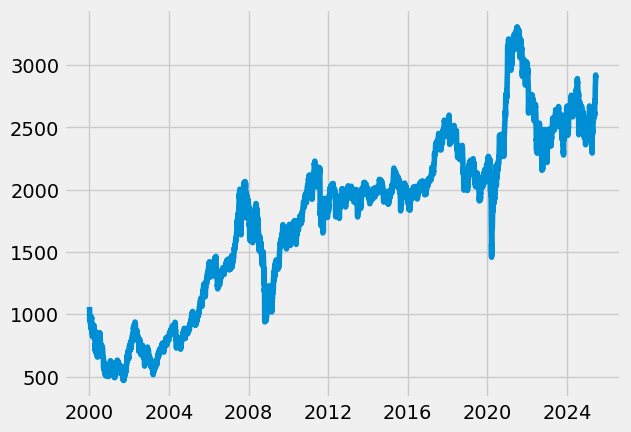

In [8]:
datag1=data1[['Close']]
plt.plot(datag1)

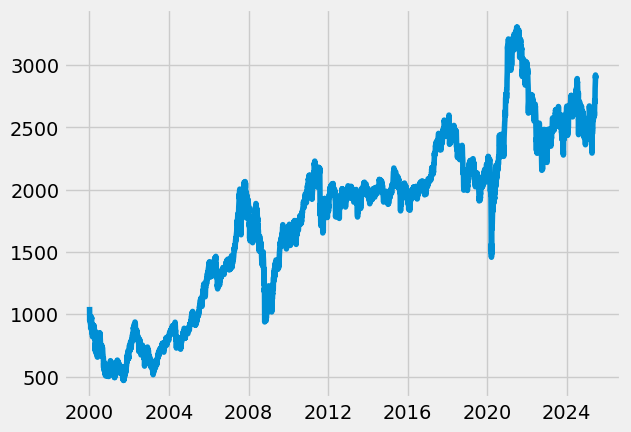

In [9]:
datag2=data2[['Close']]
plt.plot(datag2)

In [10]:
Kospi=data1

In [11]:
Kospi['Return']=np.log(Kospi['Close']/Kospi['Close'].shift(1))

In [12]:
Kospi.tail()

Price,Close,High,Low,Open,Volume,Return
Ticker,^KS11,^KS11,^KS11,^KS11,^KS11,
Date,,,,,,
2025-06-09,2855.770020,2867.270020,2841.389893,2841.560059,537600,0.015428
2025-06-10,2871.850098,2885.669922,2849.669922,2872.620117,508200,0.005615
2025-06-11,2907.040039,2908.159912,2879.919922,2887.320068,393900,0.012179
2025-06-12,2920.030029,2934.310059,2909.989990,2909.989990,713700,0.004459
2025-06-13,2894.620117,2932.379883,2877.070068,2930.570068,931700,-0.008740


In [13]:
Kospi.head()

Price,Close,High,Low,Open,Volume,Return
Ticker,^KS11,^KS11,^KS11,^KS11,^KS11,
Date,,,,,,
2000-01-04,1059.040039,1066.180054,1016.590027,1028.329956,195900,NaN
2000-01-05,986.309998,1026.520020,984.049988,1006.869995,257700,-0.071147
2000-01-06,960.789978,1014.900024,953.500000,1013.950012,203500,-0.026215
2000-01-07,948.650024,970.159973,930.840027,949.169983,215700,-0.012716
2000-01-10,987.239990,994.940002,974.820007,979.669983,240200,0.039873


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

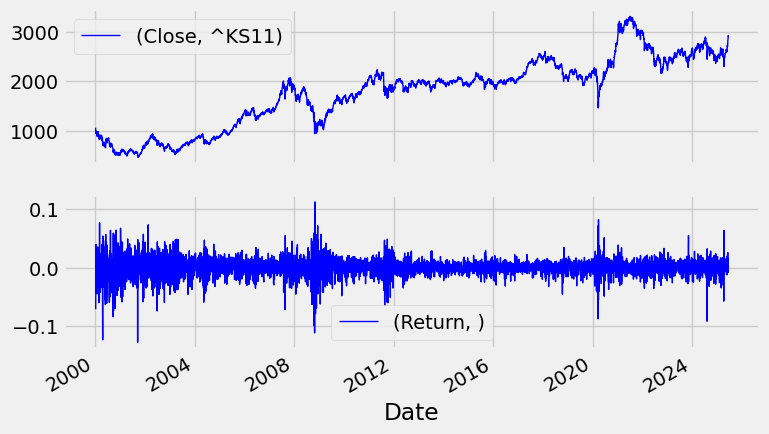

In [14]:
Kospi[['Close','Return']].plot(subplots=True, style='b', lw='1', figsize=(8,5))

In [15]:
Kospi['40d']=Kospi['Close'].rolling(window=40).mean()
Kospi['240d']=Kospi['Close'].rolling(window=240).mean()

In [16]:
Kospi[['Close', '40d', '240d']].tail()

Price,Close,40d,240d
Ticker,^KS11,,
Date,,,
2025-06-09,2855.770020,2574.989246,2594.650915
2025-06-10,2871.850098,2588.429749,2595.344790
2025-06-11,2907.040039,2603.763251,2596.090082
2025-06-12,2920.030029,2615.637500,2596.778166
2025-06-13,2894.620117,2627.185004,2597.345667


<Axes: xlabel='Date'>

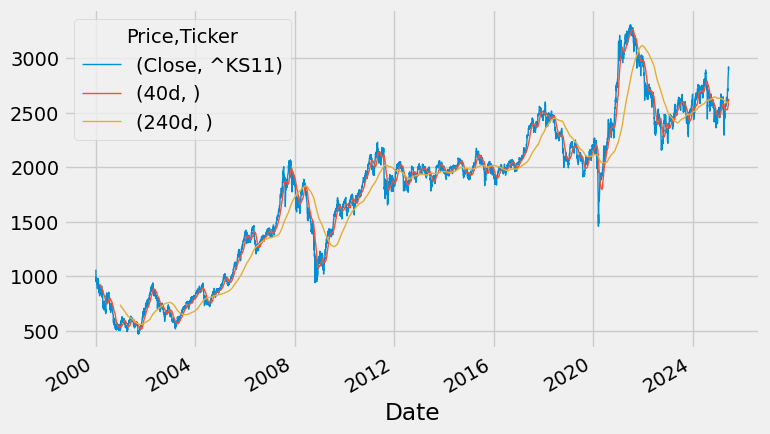

In [17]:
Kospi[['Close', '40d', '240d']].plot(lw='1', figsize=(8,5))

In [18]:
Kospi['Mov_vol']=Kospi['Return'].rolling(window=245).std()*math.sqrt(245)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

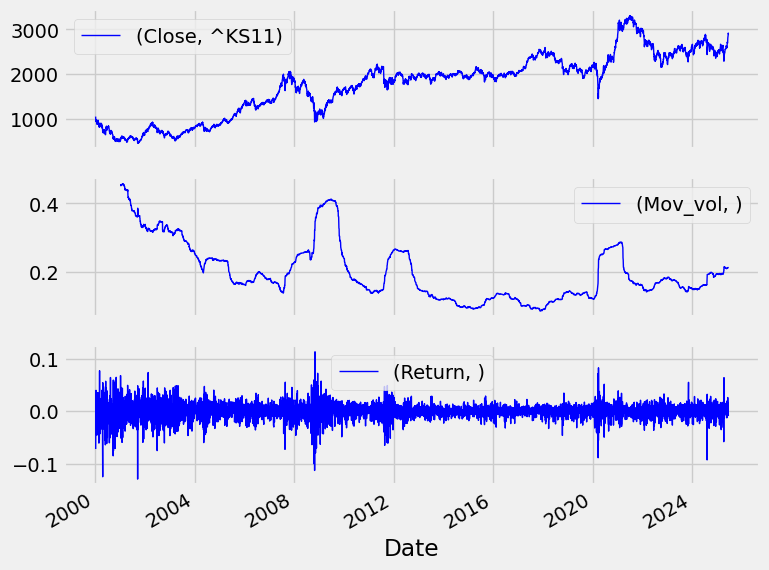

In [19]:
Kospi[['Close','Mov_vol', 'Return']].plot(subplots=True, style='b', lw='1', figsize=(8,7))